## Taller 5

### Encontrar el tamaño de la vesícula

In [1]:
%pylab inline
from scipy import ndimage

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


Populating the interactive namespace from numpy and matplotlib


In [2]:
from PIL import Image
from PIL import ImageOps
from skimage import feature

Lo primero que se hace es importar la imagen, luego se pasa la imagen a escala de grises, tambien se le aplica un poco de contraste a la imagen para que canny funcione mejor. Por ultimo, se pasa la imagen a forma de vector con la función de numpy asarray.

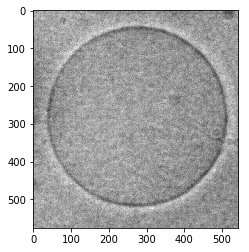

In [4]:
Im1 = pylab.imread("ves_full_150_002.jpg")
#print imagen
pylab.imshow(Im1, cmap = cm.Greys_r)
pylab.gray()

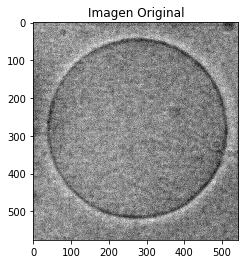

In [5]:
foto = Image.open("ves_full_150_002.jpg")
imagen_gris = foto.convert('L')
autocontraste = ImageOps.autocontrast(imagen_gris, cutoff=0)
autocontraste.show()
Im_1=numpy.asarray(autocontraste)
plt.title('Imagen Original', fontsize=12)
pylab.imshow(Im_1)

Luego, se palica canny que basicamente reconoce los bordes de la figura, en este caso se utilizo un sigma de 4 en el canny para eliminar todo el ruido que pueda tener la imagen.

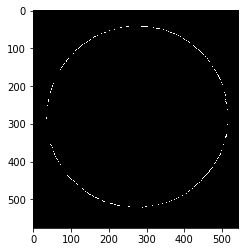

In [6]:
edges3 = feature.canny(Im_1,sigma=4)
plt.imshow(edges3, cmap=plt.cm.gray)

In [7]:
from skimage import data, color
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte

Luego, se aplica hough para formar el circulo de la vesiculo y asi poder determinar su tamaño, en este caso los limites para el tamaño de la vesicula que se utlizaron fueron de 200 y 350.

In [8]:
hough_radii = np.arange(200, 350, 2)
hough_res = hough_circle(edges3, hough_radii)

In [9]:
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,
                                           total_num_peaks=1)

Luego, con la función cincle_perimeter obtenemos los puntos del perimetro dle circulo y lo graficamos

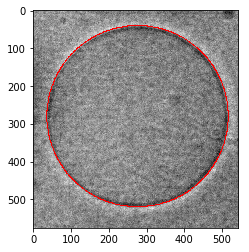

In [10]:
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius)
    plt.plot(circx,circy,',r')
pylab.imshow(Im_1)

In [11]:
radii,cx,cy

(array([240]), array([275]), array([281]))

La vesícula tiene de diámetro 480 pixeles y la posición de su centroide es 275 en x y 281 en y

## Granulometria

Lo primero que se hizo fue importar la imagen original

Text(0.5,1,'Imagen Original')

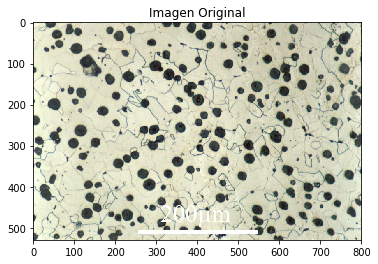

In [12]:
Im1 = pylab.imread("000398.jpg")
#print imagen
pylab.imshow(Im1, cmap = cm.Greys_r)
plt.title('Imagen Original', fontsize=12)

In [13]:
import cv2

Luego se utliza la libreria cv2 para covertir la imagen en binario.

In [14]:
img = cv2.imread('000398.jpg')
img2 = cv2.imread('000398.jpg')
img3 = cv2.imread('000398.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
ret2, thresh2 = cv2.threshold(gray,255,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

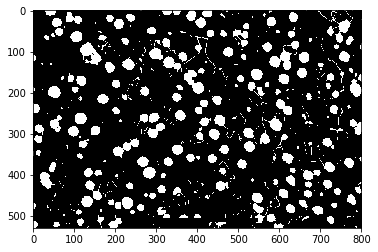

In [28]:
pylab.imshow(thresh)

In [16]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.3*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

Luego, se reconoce lo que es grafito y lo que no es.

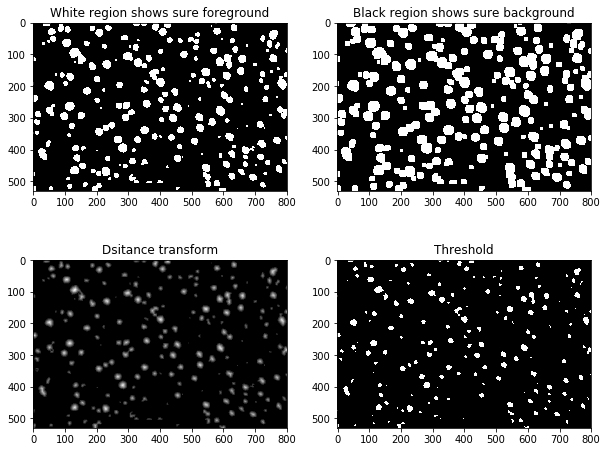

In [31]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
plt.title("White region shows sure foreground")
pylab.imshow(opening)
plt.subplot(2,2,2)
plt.title("Black region shows sure background")
pylab.imshow(sure_bg)
plt.subplot(2,2,3)
plt.title("Dsitance transform")
pylab.imshow(dist_transform)
plt.subplot(2,2,4)
plt.title("Threshold")
pylab.imshow(sure_fg)

Se le ponen marcadores a los nodulos de grafito.

In [33]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

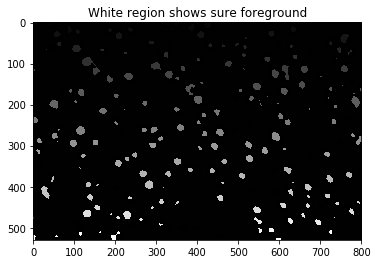

In [34]:
plt.title("White region shows sure foreground")
pylab.imshow(markers)

Y por último ponemos los mercadares reconocidos sobre la imagen.

In [35]:
markers = cv2.watershed(img,markers)

In [36]:
img[markers == -1] = [255,0,0]

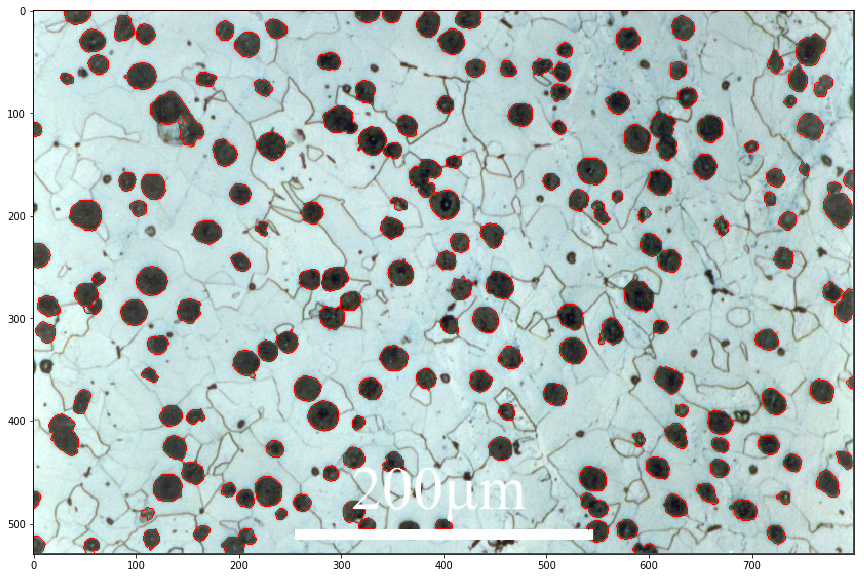

In [37]:
plt.figure(figsize=(20,10))
plt.imshow(img)

In [38]:
ret

184

Para poder aplicar hough se hace que la imagen tenga fonfo negro y los marcadores esten en blanco.

In [39]:
for i in range (0,530):
    for y in range(0,800):
        for z in range(0,3):
        
            img2[i][y][z]=0

In [40]:
img2[markers == -1] = [255,255,255]

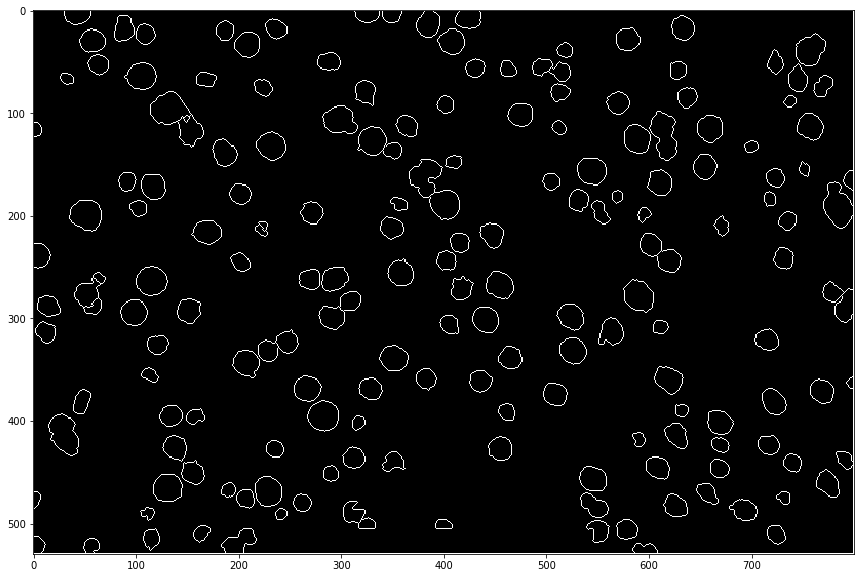

In [41]:
plt.figure(figsize=(20,10))
plt.imshow(img2)

Luego, se aplica hough teniendo como limites 5 y 20, y sabiendo que hay aproximadamente 184 circulos.

In [42]:
from skimage import data, color
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte

In [43]:
gray3 = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

In [44]:
hough_radii = np.arange(5,20,1)
hough_res = hough_circle(gray3, hough_radii)

In [45]:
hough_radii

array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [46]:
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,
                                           total_num_peaks=184)

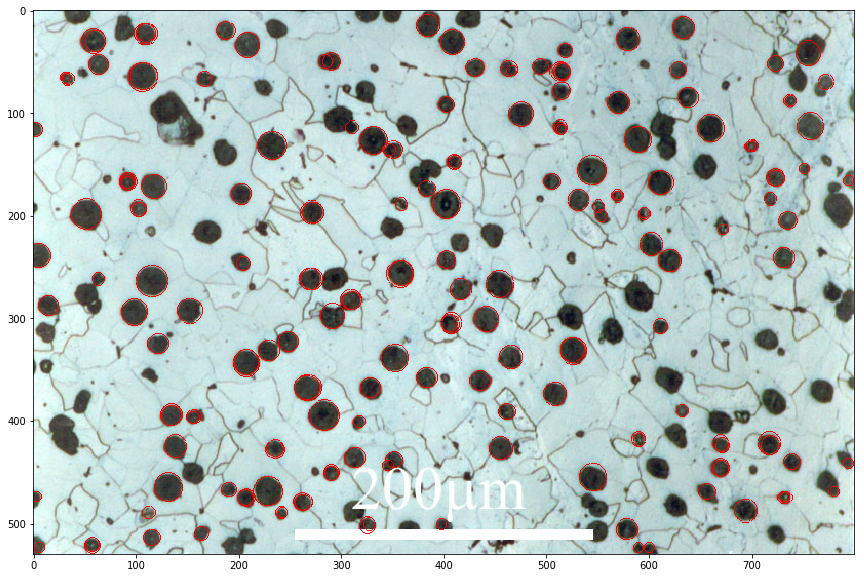

In [47]:
plt.figure(figsize=(20,10))
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius)
    plt.plot(circx,circy,',r')

plt.imshow(img3)

Se recorta la imagen original para poder hacer la conversión de pixeles a $\mu$/m

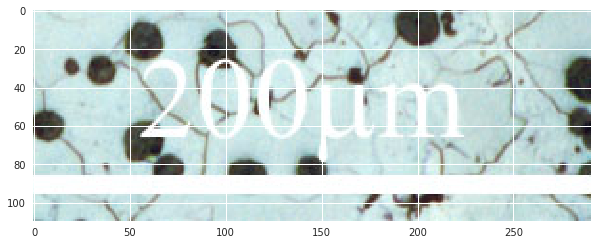

In [142]:
lx, ly = img3.shape[0:2]
# Cropping
crop_face = img3[420:600,255:546, :]
plt.figure(figsize=(10,5))
plt.imshow(crop_face)

Se tiene que 200 $\mu$/m son aproximadamente 291 pixeles, utilizaremos este valor como factor de conversión,

In [49]:
radiome=radii*(200/291)

In [50]:
Diametro = radiome*2

Siendo los diametros [$\mu$/m] encontrados: 

In [51]:
Diametro

array([  8.24742268,   8.24742268,   9.62199313,  12.37113402,
         6.87285223,   8.24742268,  10.99656357,  10.99656357,
         9.62199313,   9.62199313,  10.99656357,  13.74570447,
         6.87285223,   6.87285223,   6.87285223,   9.62199313,
        16.49484536,  13.74570447,  10.99656357,   8.24742268,
        17.86941581,  17.86941581,  13.74570447,   6.87285223,
         6.87285223,  12.37113402,  12.37113402,  12.37113402,
        10.99656357,  10.99656357,  10.99656357,   9.62199313,
         9.62199313,  13.74570447,   8.24742268,   8.24742268,
         8.24742268,  15.12027491,  19.24398625,  13.74570447,
         6.87285223,  13.74570447,   6.87285223,  13.74570447,
         9.62199313,  10.99656357,  10.99656357,  19.24398625,
        15.12027491,  16.49484536,  12.37113402,  12.37113402,
         8.24742268,   8.24742268,  17.86941581,  15.12027491,
        10.99656357,  10.99656357,  17.86941581,  12.37113402,
        13.74570447,  13.74570447,  13.74570447,  13.74

Se usa la libreria seaborn para ver la disribución e histograma de los nodulos de grafito.

In [52]:
import seaborn as sns
sns.set(color_codes=False)

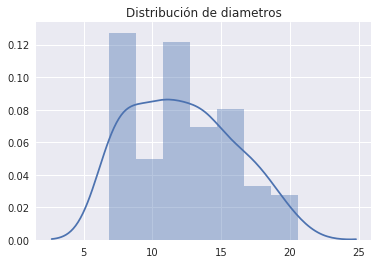

In [58]:
plt.title("Distribución de diametros")
sns.distplot(Diametro)

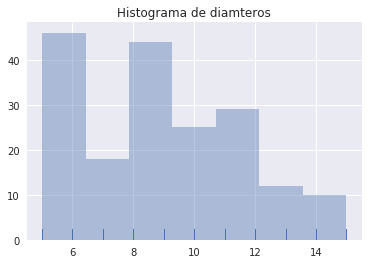

In [57]:
plt.title("Histograma de diamteros")
sns.distplot(radii, kde=False, rug=True)

Luego, se terminar del ejercicio de granulometria se puede conculir que existe un error considerable ya que algunos circulos se contaron más de una vez. Esto debido a que algunos nodulos tienen más forma circular que otros lo que conlleva a que se formen más criculos en estos nodulos.

Igualmente, se encontro que para granos que no tiene forma circular, como en la siguiente imagen:

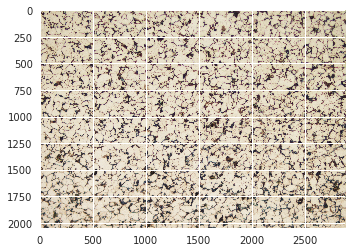

In [59]:
Im4 = pylab.imread("200x_1010_T.tif")
#print imagen
pylab.imshow(Im4)

No es posible encontrar el tamaño de lso granos debido a que no hay aproximación de hough posible.